# NLP nltk for english and pythai for thai

In [1]:
import nltk

In [2]:
sentence = "UC San Diego is a great place to study cognitive science."

In [3]:
# Download some useful data files from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [4]:
tokens = nltk.word_tokenize(sentence)

In [5]:
print(tokens)

['UC', 'San', 'Diego', 'is', 'a', 'great', 'place', 'to', 'study', 'cognitive', 'science', '.']


In [6]:
tags = nltk.pos_tag(tokens)

In [8]:
print(tags)

[('UC', 'NNP'), ('San', 'NNP'), ('Diego', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('place', 'NN'), ('to', 'TO'), ('study', 'VB'), ('cognitive', 'JJ'), ('science', 'NN'), ('.', '.')]


In [11]:
entities = nltk.chunk.ne_chunk(tags)

In [12]:
print(entities)

(S
  UC/NNP
  (PERSON San/NNP Diego/NNP)
  is/VBZ
  a/DT
  great/JJ
  place/NN
  to/TO
  study/VB
  cognitive/JJ
  science/NN
  ./.)


In [13]:
print(nltk.corpus.stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Imports
%matplotlib inline

# Standard Python has some useful string tools
import string

# Collections is a part of standard Python, with some useful data objects
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn has some useful NLP tools, such as a TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# Load the data
with open('book10k.txt', 'r') as file:
    sents = file.readlines()

In [17]:
# Check out the data - print out the first and last sentences, as examples
print(sents[0])
print(sents[-1])

the half-ling book one in the fall of igneeria series kaylee soderburg copyright 2013 kaylee soderburg all rights reserved .

alejo was sure the fact that he was nervously repeating mass along with five wrinkly , age-encrusted spanish women meant that stalin was rethinking whether he was going to pay the price .



In [18]:
# Preprocessing: strip all extra whitespace from the sentences
sents = [sent.strip() for sent in sents]

In [19]:
# Tokenize all the sentences into words
#  This collects all the word tokens together into one big list
tokens = []
for x in sents:
    tokens.extend(nltk.word_tokenize(x))

In [20]:
# Check out how many words are in the data
print('Number of words in the data: \t', len(tokens))
print('Number of unique words: \t', len(set(tokens)))

Number of words in the data: 	 140094
Number of unique words: 	 8221


In [21]:
# Use the 'counter' object to count how many times each word appears
counts = Counter(tokens)

In [22]:
# Check out the counts object, printing out some of the most common tokens
counts.most_common(25)

[('.', 8601),
 (',', 6675),
 ('the', 6062),
 ('and', 3382),
 ('to', 3328),
 ('``', 2852),
 ('i', 2747),
 ('a', 2480),
 ('of', 2122),
 ('was', 1752),
 ('he', 1678),
 ('in', 1616),
 ('you', 1483),
 ('her', 1353),
 ('his', 1349),
 ('?', 1153),
 ('she', 1153),
 ('that', 1134),
 ('it', 1050),
 ("'s", 1023),
 ('had', 898),
 ('with', 894),
 ('alejo', 890),
 ('wara', 875),
 ('at', 818)]

In [23]:
# The 'string' module (standard library) has a useful list of punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
# Drop all punction markers from the counts object
for punc in string.punctuation:
    if punc in counts:
        counts.pop(punc)

In [25]:
# Get the top 10 most frequent words
top10 = counts.most_common(10)

In [26]:
# Extract the top words, and counts
top10_words = [it[0] for it in top10]
top10_counts = [it[1] for it in top10]

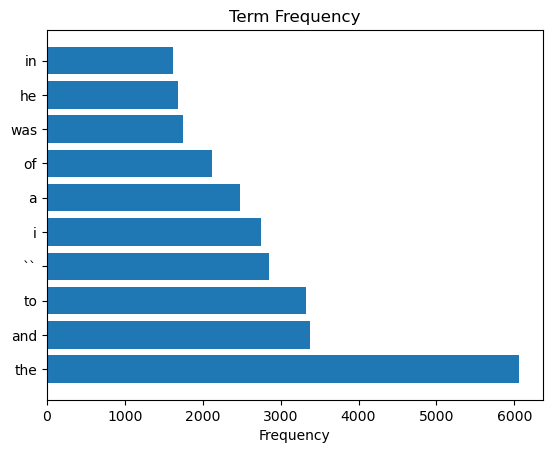

In [27]:
# Plot a barplot of the most frequent words in the text
plt.barh(top10_words, top10_counts)
plt.title('Term Frequency');
plt.xlabel('Frequency');

In [28]:
# Drop all stop words
for stop in nltk.corpus.stopwords.words('english'):
    if stop in counts:
        counts.pop(stop)

In [29]:
# Get the top 20 most frequent words, of the stopword-removed data
top20 = counts.most_common(20)

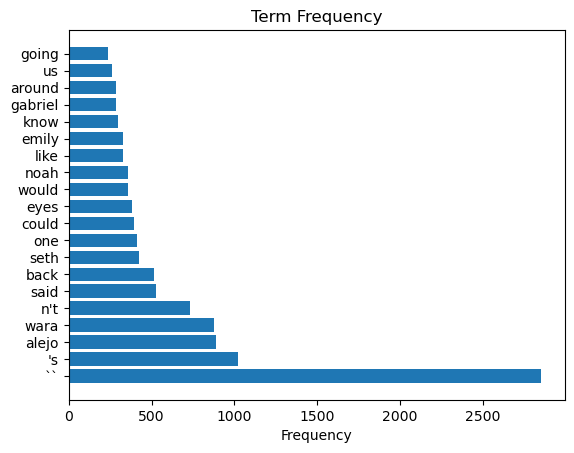

In [30]:
# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in top20], [it[1] for it in top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

In [31]:
# Initialize a TFIDF object, applying some settings
tfidf = TfidfVectorizer(analyzer='word',
                        sublinear_tf=True,
                        max_features=5000,
                        tokenizer=nltk.word_tokenize)

In [32]:
# Learn the TFIDF representation of our data
#   Note that this takes the raw sentences, tokenizes them, and learns the TF/IDF representation
tdidf = tfidf.fit(sents)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
# Get the IDF weights for the top 10 most common words
IDF_weights = [tfidf.idf_[tfidf.vocabulary_[token]] for token in top10_words]

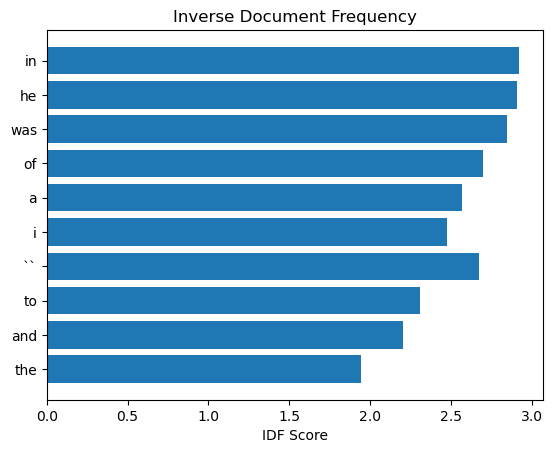

In [34]:
# Plot the IDF scores for the very common words
plt.barh(top10_words, IDF_weights)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

In [35]:
# Get the terms with the highest IDF score
inds = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens = [list(tfidf.vocabulary_)[ind] for ind in inds]
top_IDF_scores = tfidf.idf_[inds]

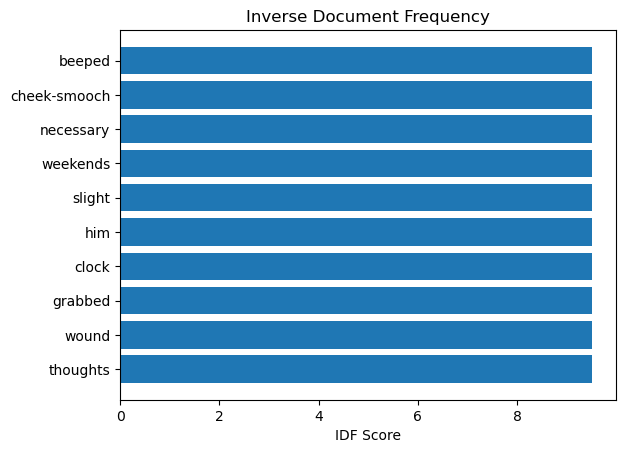

In [36]:
# Plot the terms with the highest IDF score
plt.barh(top_IDF_tokens, top_IDF_scores)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

In [37]:
# Apply TF/IDF representation to our data
tfidf_books = tdidf.transform(sents).toarray()

In [38]:
print("Number of documents: \t\t", len(sents))
print("Number of terms: \t\t", len(tfidf.vocabulary_))
print("TFIDF representation shape: \t", tfidf_books.shape)

Number of documents: 		 10000
Number of terms: 		 5000
TFIDF representation shape: 	 (10000, 5000)
